# Praktek TF-IDF

**Restu Lestari Mulianingrum (A11.2022.14668)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
dataset = pd.read_csv('review_dana_labelled.csv')

In [3]:
dataset.head(10)

userName  score                   at  \
0     Elisya Kasni      5  2024-02-15 11:24:56   
1       Rusman Man      2  2024-02-15 11:24:03   
2     Qiliw Sadega      1  2024-02-15 11:23:34   
3  Kijutjrv2 Kijut      3  2024-02-15 11:22:46   
4     Fifi Alfiyah      1  2024-02-15 11:21:34   
5           Kiki57      3  2024-02-15 11:21:13   
6    Parhan Parhan      1  2024-02-15 11:19:32   
7    Dewi Anggreni      5  2024-02-15 11:19:22   
8      Bang Ewok13      1  2024-02-15 11:18:01   
9        M Alifian      5  2024-02-15 11:17:58   

                                             content  sentimen  
0                                              Bagus  POSITIVE  
1                             Dana mmg keren mantap.  POSITIVE  
2  Saya ngajuin upgrade dana premium krna ktp say...  NEGATIVE  
3  Kocak mana diskon nya ml malah eror segala kag...  NEGATIVE  
4  Saldo hilang karena no lama Hilang ganti no sa...  NEGATIVE  
5                                              mayan  POSITIVE  
6  Udah gua hapus dana ya. ilang ya udah 1 juta l...  NEGATIVE  
7                                               baik  POSITIVE  
8  TOLONG UNTUK SISTEM KEAMANAN DI PERBAIKI. KALA...   NEUTRAL  
9                               mempermudah transfer  POSITIVE

In [4]:
dataset_feature=dataset['content'].astype(str)

In [5]:
dataset_feature

0                                                    Bagus
1                                   Dana mmg keren mantap.
2        Saya ngajuin upgrade dana premium krna ktp say...
3        Kocak mana diskon nya ml malah eror segala kag...
4        Saldo hilang karena no lama Hilang ganti no sa...
                               ...                        
49995                                                Bagus
49996                              error, tidak bisa masuk
49997                                       Cukup membantu
49998    tolong pihak dana knp saldo saya hilang,ada yg...
49999                                              good. 👌
Name: content, Length: 50000, dtype: object

In [6]:
dataset.shape

(50000, 5)

In [7]:
dataset

userName  score                   at  \
0         Elisya Kasni      5  2024-02-15 11:24:56   
1           Rusman Man      2  2024-02-15 11:24:03   
2         Qiliw Sadega      1  2024-02-15 11:23:34   
3      Kijutjrv2 Kijut      3  2024-02-15 11:22:46   
4         Fifi Alfiyah      1  2024-02-15 11:21:34   
...                ...    ...                  ...   
49995      Marha Marha      5  2023-12-31 16:34:55   
49996     Unique Laudy      1  2023-12-31 16:33:47   
49997  supendi supendi      5  2023-12-31 16:30:08   
49998   hasansend farm      1  2023-12-31 16:28:51   
49999    Maria Awoitau      1  2023-12-31 16:28:46   

                                                 content  sentimen  
0                                                  Bagus  POSITIVE  
1                                 Dana mmg keren mantap.  POSITIVE  
2      Saya ngajuin upgrade dana premium krna ktp say...  NEGATIVE  
3      Kocak mana diskon nya ml malah eror segala kag...  NEGATIVE  
4      Saldo hilang karena no lama Hilang ganti no sa...  NEGATIVE  
...                                                  ...       ...  
49995                                              Bagus  POSITIVE  
49996                            error, tidak bisa masuk  NEGATIVE  
49997                                     Cukup membantu  POSITIVE  
49998  tolong pihak dana knp saldo saya hilang,ada yg...   NEUTRAL  
49999                                            good. 👌  NEGATIVE  

[50000 rows x 5 columns]

In [8]:
dataset_label = dataset['score']
dataset_label

0        5
1        2
2        1
3        3
4        1
        ..
49995    5
49996    1
49997    5
49998    1
49999    1
Name: score, Length: 50000, dtype: int64

## Cek Distribusi Score

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\RESTU\AppData\Local\Temp\ipykernel_9816\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


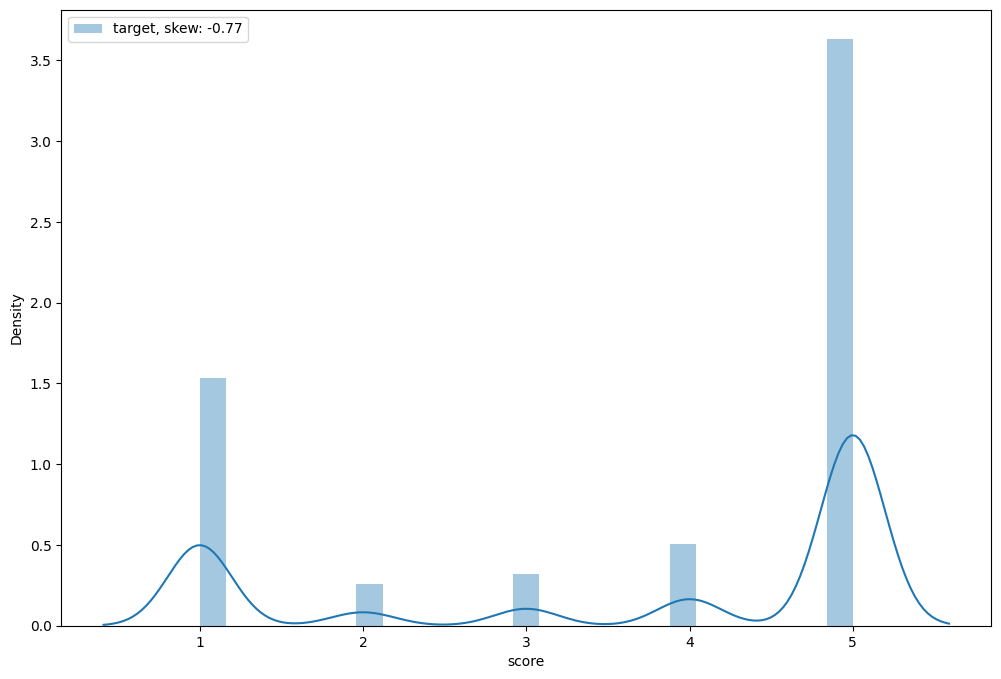

In [10]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [11]:
dataset_label.value_counts()

score
5    29053
1    12279
4     4043
3     2578
2     2047
Name: count, dtype: int64

## TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer()

In [14]:
X = vectorizer.fit_transform(dataset_feature)

In [15]:
print(X.shape)

(50000, 18619)


In [16]:
features = vectorizer.get_feature_names_out()

In [17]:
features

array(['00', '000', '0000', ..., '𝟒𝒓𝒆𝒃𝒖', '𝟕𝟗𝒓𝒆𝒃𝒖', '𝟚𝟜𝟞𝟠𝟙𝟘'],
      dtype=object)

In [18]:
idfValues = vectorizer.idf_

In [19]:
d = dict(zip(features, 9 - idfValues))

In [20]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [21]:
for i in range(3867):
    print(sortedDict[i])

('dana', 6.456610687735601)
('sangat', 6.195135291423287)
('saya', 6.023528166031985)
('di', 6.0054676693054665)
('bisa', 5.953586312566362)
('bagus', 5.854227701232739)
('aplikasi', 5.577033550534768)
('dan', 5.544709819540303)
('tidak', 5.5367565612431395)
('ada', 5.47049430701403)
('ini', 5.4659671363040445)
('nya', 5.441211501813542)
('mantap', 5.411311556117868)
('membantu', 5.403292266951248)
('ke', 5.2523570239779644)
('saldo', 5.2413730754806345)
('mau', 5.078984072760024)
('uang', 5.040386773261879)
('transaksi', 5.034582926442079)
('akun', 4.971724534940446)
('ok', 4.9625920513771735)
('gak', 4.957994342128544)
('sudah', 4.938535183280624)
('baik', 4.934254354825471)
('masuk', 4.910376511035936)
('tapi', 4.87823088606252)
('ga', 4.840316034963642)
('tolong', 4.8322724619061965)
('padahal', 4.803354784266617)
('yg', 4.795500055615529)
('yang', 4.752704700810098)
('lagi', 4.740802878558271)
('kenapa', 4.7334883213901335)
('apk', 4.690084776944628)
('aja', 4.659501353572548)
('u

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [23]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

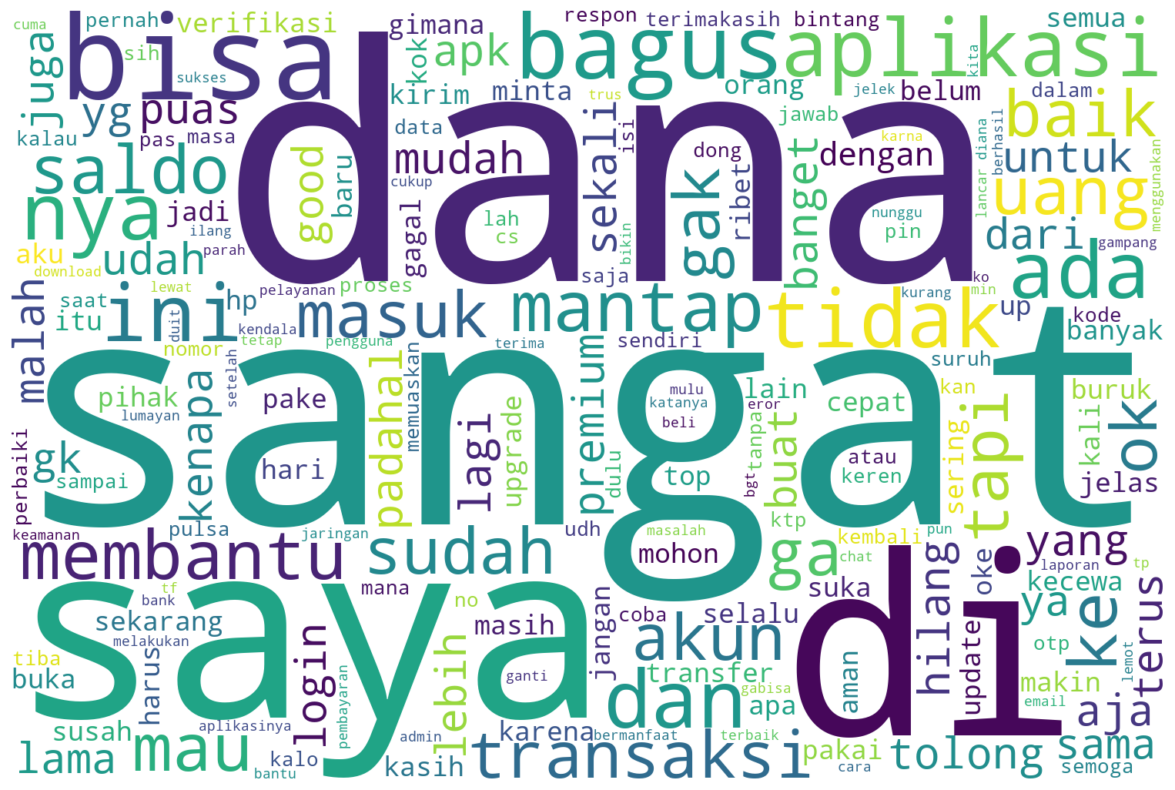

In [24]:
PlotWordCloud(d)